# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# DATA EXPLORATION

In [27]:
customer_data = pd.read_csv('Mall_customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [30]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualize the relationship between Age, Annual Income, and Spending Score.

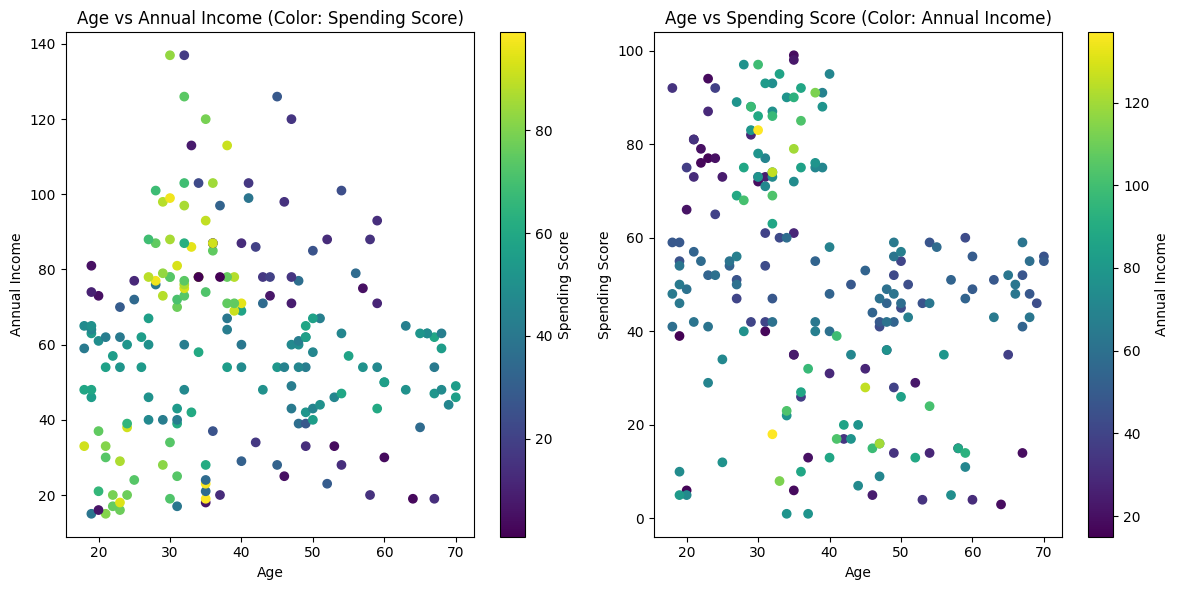

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(customer_data['Age'], customer_data['Annual Income (k$)'], c=customer_data['Spending Score (1-100)'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs Annual Income (Color: Spending Score)')
plt.colorbar(label='Spending Score')

plt.subplot(1, 2, 2)
plt.scatter(customer_data['Age'], customer_data['Spending Score (1-100)'], c=customer_data['Annual Income (k$)'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score (Color: Annual Income)')
plt.colorbar(label='Annual Income')

plt.tight_layout()
plt.show()

## Visualize the distribution of values in Age, Annual Income, and Spending Score according to Gender.

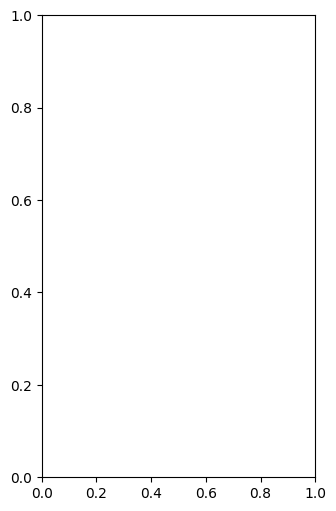

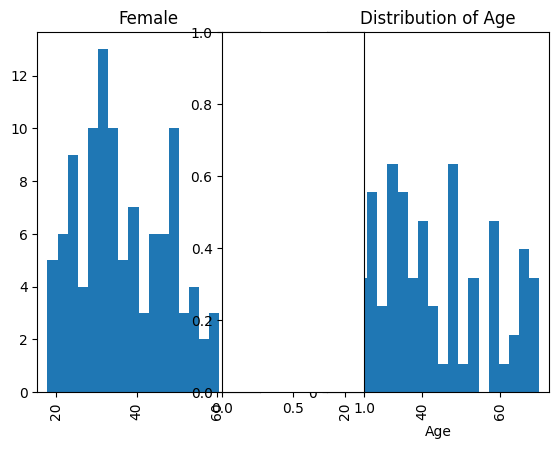

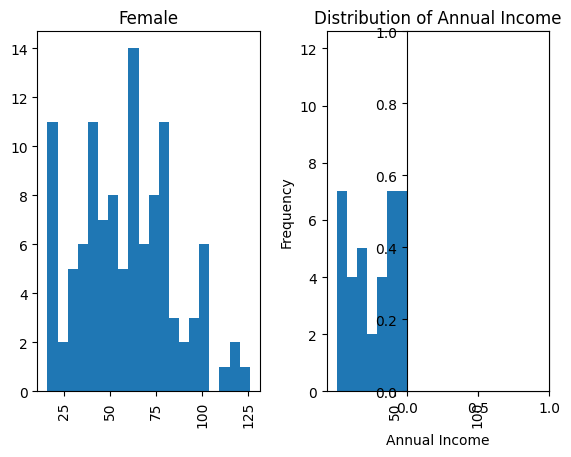

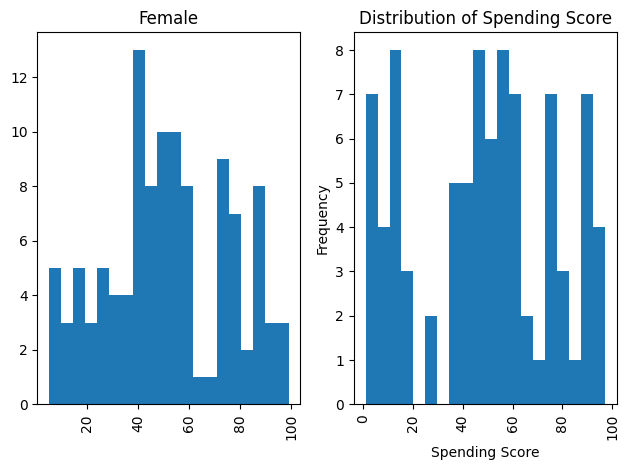

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
customer_data['Age'].hist(by=customer_data['Gender'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
customer_data['Annual Income (k$)'].hist(by=customer_data['Gender'], bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
customer_data['Spending Score (1-100)'].hist(by=customer_data['Gender'], bins=20)
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

## Performing K-means clustering using Age, Annual Income, and Spending Score.

In [22]:
X3 = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans3 = kmeans3.fit_predict(X3)

Visualize the clusters based on Age, Annual Income, and Spending Score

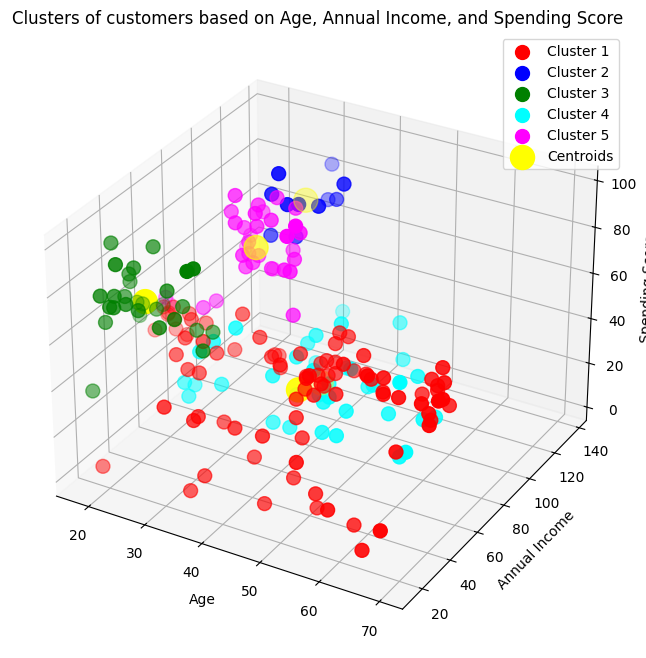

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X3[y_kmeans3 == 0, 0], X3[y_kmeans3 == 0, 1], X3[y_kmeans3 == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(X3[y_kmeans3 == 1, 0], X3[y_kmeans3 == 1, 1], X3[y_kmeans3 == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(X3[y_kmeans3 == 2, 0], X3[y_kmeans3 == 2, 1], X3[y_kmeans3 == 2, 2], s=100, c='green', label='Cluster 3')
ax.scatter(X3[y_kmeans3 == 3, 0], X3[y_kmeans3 == 3, 1], X3[y_kmeans3 == 3, 2], s=100, c='cyan', label='Cluster 4')
ax.scatter(X3[y_kmeans3 == 4, 0], X3[y_kmeans3 == 4, 1], X3[y_kmeans3 == 4, 2], s=100, c='magenta', label='Cluster 5')
ax.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters of customers based on Age, Annual Income, and Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()